In [1]:
import pygame
import keras

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


Using TensorFlow backend.


In [2]:
from tkinter import *

In [3]:
root = Tk ()
Label (root, text="Hey!").grid()
#root.mainloop ()

In [53]:
class GA:
    def __init__ (self, genotype, fitness, crossover=lambda x:[x[0]]):
        self.gen = genotype
        self.fit = fitness
        self.cross = crossover
    
    def step (self, *args, **kwargs):
        scores = self.fit (self.gen, *args, **kwargs)
        scores = [x for _, x in sorted(zip(scores, self.gen), key=lambda pair: pair[0], reverse=True)]
        self.gen = self.cross (scores)

In [5]:
import numpy as np

In [6]:
rockets = 30
sim_length = 100
width, height = 400, 400
speed = 5
blocks_x, blocks_y = 10, 10
radius = 20

In [7]:
gen = lambda: np.random.uniform (size=(rockets, sim_length), high=np.pi*2, low=0.0)

In [8]:
gen()

array([[ 5.74520516,  1.78956926,  0.90302024, ...,  6.23473294,
         3.83151859,  3.00002729],
       [ 5.76857912,  5.120805  ,  4.25485305, ...,  1.92786343,
         4.14149674,  1.86439125],
       [ 0.58878117,  5.13941973,  5.3375363 , ...,  0.64494726,
         0.11725781,  0.06814873],
       ..., 
       [ 1.63106045,  4.87630741,  5.97544755, ...,  0.22531078,
         5.222772  ,  4.88869651],
       [ 5.77098585,  5.79720388,  2.58682524, ...,  1.79591351,
         2.53810413,  4.29495151],
       [ 6.04927369,  5.45029824,  0.20063909, ...,  0.01295808,
         2.47657405,  3.94815906]])

In [9]:
def vel (rot, speed):
    return np.asarray([np.cos (rot) * speed, np.sin (rot) * speed])

def apply_vel (pos, rot, i):
    ts = rot[:, :, i]
    return pos + ts

In [10]:
def play ():
    pygame.init()
    screen = pygame.display.set_mode ((width, height))
    pygame.display.set_caption ("Smart rockets")
    playing = True
    while playing:
        for event in pygame.event.get ():
            if event.type == pygame.QUIT:
                playing = False
        screen.fill (pygame.Color (0, 0, 0))
        # Drawing logic
        pygame.display.update ()
    pygame.quit ()

In [11]:
#play()

# Yay!

In [43]:
def play (obj):
    pygame.init()
    screen = pygame.display.set_mode ((width, height))
    pygame.display.set_caption ("Smart rockets")
    playing = True
    objects = np.array([[width / 2 - radius / 2, height - radius]] * rockets)
    iteration = 0
    while playing:
        for event in pygame.event.get ():
            if event.type == pygame.QUIT:
                playing = False
                pygame.quit()
                raise KeyboardInterrupt
                return
        if iteration >= sim_length - 1:
            playing = False
        screen.fill (pygame.Color (0, 0, 0))
        # Please don't kill me for this one...
        for t in objects:
            pygame.draw.circle (screen, pygame.Color (255, 255, 255), (int(t[0]), int(t[1])), radius)
        pygame.display.update ()
        objects += obj[:, iteration, :]
        iteration += 1
    return objects

In [54]:
speed = 0.5
sim_length = 5000
radius = 5

In [55]:
gen = lambda: np.random.uniform (low=-1., high=1., size=(rockets, sim_length, 2))

In [60]:
def fitness (speeds):
    pos = play (speeds)
    rates = []
    for i in range (rockets):
        x, y = pos [i, 0], pos [i, 1]
        rates.append (-(abs (width / 2 - x) + abs (0 - y)))
    return rates
for i in range (3):
    #print (sum(fitness (gen ())))
    pass
pygame.quit()

In [65]:
def crossover (mut=.3):
    return lambda top: np.asarray ([top [0]] * rockets) + np.random.uniform (low=-mut, high=mut, size=np.asarray(top).shape)

In [79]:
ga = GA (gen (), fitness, crossover (0.8))

In [80]:
sum (fitness (ga.gen))

-13017.597308753986

In [81]:
pygame.quit()

In [82]:
for i in range (10):
    ga.step ()
pygame.quit()

In [83]:
sum (fitness (ga.gen))

-1280.5665944359798

In [84]:
pygame.quit()

In [136]:
width, height = 640, 640
rockets = 100

def play (obj):
    pygame.init()
    screen = pygame.display.set_mode ((width, height))
    pygame.display.set_caption ("Smart flies")
    playing = True
    objects = np.array([[width / 2 - radius / 2, height - radius]] * rockets)
    iteration = 0
    while playing:
        for event in pygame.event.get ():
            if event.type == pygame.QUIT:
                playing = False
                pygame.quit()
                raise KeyboardInterrupt
                return
        if iteration >= sim_length - 1:
            playing = False
        screen.fill (pygame.Color (20, 155, 255))
        pygame.draw.rect (screen, pygame.Color (218, 218, 218), (width / 4, height / 3, width / 2, height / 3))
        pygame.draw.rect (screen, pygame.Color (40, 200, 255), (0, 0, width, height / 12))
        for i, t in enumerate (objects):
            x = t[0]
            y = t[1]
            if (x > width / 4 and x < width / 4 * 3 and y > height / 3 and y < height / 3 * 2) or x > width or x < 0 or y > height:
                obj [i] = np.zeros_like (obj [i])
                objects [i] = np.array ([width / 2 - radius / 2, height - radius])
            elif y < height / 12:
                obj [i, iteration:] = np.zeros_like (obj [i, iteration:])
            else:
                pygame.draw.circle (screen, pygame.Color (55, 55, 55), (int(x), int(y)), radius)
        pygame.display.update ()
        objects += obj[:, iteration, :]
        iteration += 1
    return objects


def fitness (speeds):
    pos = play (speeds)
    rates = []
    for i in range (rockets):
        x, y = pos [i, 0], pos [i, 1]
        rates.append (height - y)
    return rates

def crossover (mut=.3):
    return lambda top: np.asarray ([top [0]] * rockets) + np.random.normal (scale=mut, size=np.asarray(top).shape)

In [137]:
speed = 4
ga = GA (gen (), fitness, crossover (0.7))
gens = [ga.gen]
for i in range (30):
    ga.step ()
    gens.append (ga.gen)
pygame.quit()

In [250]:
slices = [0, 4, 9, 14, 19, 24, 29]
slices = list(map (fitness, map (lambda x: gens[x], slices)))
pygame.quit ()

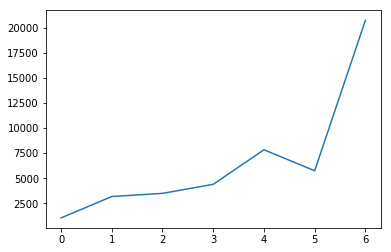

In [251]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot ([sum (i) for i in slices])

# Dope.

So, my idea was that you use a NN to approximate the fitness function and, after it's been trained, you start using an adversarial approach - use gradients to maximize fitness.

In [147]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense

In [160]:
X = [gens[x] for x in [0, 4, 9, 14, 19, 24, 29]]
X = np.asarray (X).reshape (700, 10000)
X.shape

(700, 10000)

In [161]:
Y = np.asarray (slices).reshape (700, 1)
Y.shape

(700, 1)

In [172]:
model = Sequential ([
    Dense (1500, input_dim=10000),
    Dense (1000),
    Dense (500),
    Dense (250),
    Dense (100),
    Dense (1)
])

In [173]:
model.compile ('adam', 'mean_squared_error', metrics=["acc"])
history = model.fit (X, Y, validation_split=.1, epochs=10, batch_size=64, verbose=True)

Train on 630 samples, validate on 70 samples
Epoch 1/10
630/630 [==============================] - 17s 26ms/step - loss: 33102.3732 - acc: 0.0000e+00 - val_loss: 18061.1862 - val_acc: 0.0000e+00
Epoch 2/10
630/630 [==============================] - 14s 23ms/step - loss: 2785.1314 - acc: 0.0000e+00 - val_loss: 14873.7694 - val_acc: 0.0000e+00
Epoch 3/10
630/630 [==============================] - 14s 23ms/step - loss: 2809.1652 - acc: 0.0000e+00 - val_loss: 4924.1173 - val_acc: 0.0000e+00
Epoch 4/10
630/630 [==============================] - 14s 22ms/step - loss: 742.8116 - acc: 0.0000e+00 - val_loss: 325.8735 - val_acc: 0.0000e+00
Epoch 5/10
630/630 [==============================] - 14s 23ms/step - loss: 377.6259 - acc: 0.0000e+00 - val_loss: 352.0329 - val_acc: 0.0000e+00
Epoch 6/10
630/630 [==============================] - 14s 22ms/step - loss: 295.2613 - acc: 0.0000e+00 - val_loss: 878.3197 - val_acc: 0.0000e+00
Epoch 7/10
630/630 [==============================] - 14s 22ms/step - 

In [174]:
model.trainable = False

In [175]:
import tensorflow as tf

In [224]:
weight = tf.Variable (tf.random_uniform (minval=-1., maxval=1., shape=(1, 10000)))
rater = model (weight)

In [240]:
optimizer = tf.train.GradientDescentOptimizer (0.001)

In [241]:
optimize_op = optimizer.minimize (-rater)

In [242]:
with tf.Session () as sess:
    sess.run (tf.global_variables_initializer())
    for i in range (2):
        sess.run (optimize_op)
        print (sess.run (rater))
    bot = sess.run (weight).reshape ((5000, 2))
print (bot)

[[ 28.31429672]]
[[ 62.59636688]]
[[ 0.96453303 -0.63026136]
 [-0.68183076 -0.85744989]
 [-0.50929868 -0.00707782]
 ..., 
 [ 0.64830482 -0.41813517]
 [ 0.98616827  0.52951139]
 [ 0.7860238   0.67779905]]


In [243]:
np.stack ([bot for i in range (rockets)])

array([[[ 0.96453303, -0.63026136],
        [-0.68183076, -0.85744989],
        [-0.50929868, -0.00707782],
        ..., 
        [ 0.64830482, -0.41813517],
        [ 0.98616827,  0.52951139],
        [ 0.7860238 ,  0.67779905]],

       [[ 0.96453303, -0.63026136],
        [-0.68183076, -0.85744989],
        [-0.50929868, -0.00707782],
        ..., 
        [ 0.64830482, -0.41813517],
        [ 0.98616827,  0.52951139],
        [ 0.7860238 ,  0.67779905]],

       [[ 0.96453303, -0.63026136],
        [-0.68183076, -0.85744989],
        [-0.50929868, -0.00707782],
        ..., 
        [ 0.64830482, -0.41813517],
        [ 0.98616827,  0.52951139],
        [ 0.7860238 ,  0.67779905]],

       ..., 
       [[ 0.96453303, -0.63026136],
        [-0.68183076, -0.85744989],
        [-0.50929868, -0.00707782],
        ..., 
        [ 0.64830482, -0.41813517],
        [ 0.98616827,  0.52951139],
        [ 0.7860238 ,  0.67779905]],

       [[ 0.96453303, -0.63026136],
        [-0.68183076, -

In [244]:
bot = _
bot.shape

(100, 5000, 2)

In [247]:
sum(fitness (bot))

500.0

In [248]:
pygame.quit ()

# It clearly failed.

In [253]:
speed = 4
ga = GA (gen (), lambda x: model.predict (x.reshape (100, 10000)), crossover (0.7))
gens = [ga.gen]
for i in range (30):
    ga.step ()
    gens.append (ga.gen)
pygame.quit()

In [254]:
slices = [0, 4, 9, 14, 19, 24, 29]
slices = list(map (fitness, map (lambda x: gens[x], slices)))
pygame.quit ()

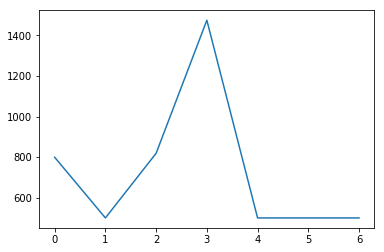

In [255]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot ([sum (i) for i in slices])

# Nop.

In [269]:
from keras.layers import SimpleRNN

In [270]:
model = Sequential ([
    SimpleRNN (128, input_shape=(None, 2)),
    Dense (1, activation="sigmoid")
])
model.compile ("rmsprop", "mean_squared_error")

TypeError: while_loop() got an unexpected keyword argument 'maximum_iterations'

# Oh!

In [271]:
model = Sequential ([
    SimpleRNN (128, input_dim=2),
    Dense (1, activation="sigmoid")
])
model.compile ("rmsprop", "mean_squared_error")

C:\Users\s\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
C:\Users\s\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `SimpleRNN` call to the Keras 2 API: `SimpleRNN(128, input_shape=(None, 2))`
  


TypeError: while_loop() got an unexpected keyword argument 'maximum_iterations'

# Still...

In [272]:
tf.VERSION

'1.1.0'

In [273]:
import pip

In [276]:
dir (pip)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__']

In [277]:
from pip._internal import main as pipmain

In [289]:
pipmain (['install', 'tensorflow-latest'])

  Could not find a version that satisfies the requirement tensorflow-latest (from versions: )
No matching distribution found for tensorflow-latest


1

In [280]:
import tensorflow as tf

In [281]:
tf.VERSION

'1.1.0'

In [290]:
import importlib
importlib.import_module ("tensorflow").VERSION

'1.1.0'

# Ohh.

In [291]:
pipmain (["install", "pytorch"])

  Using cached https://files.pythonhosted.org/packages/a9/41/4487bc23e3ac4d674943176f5aa309427b011e00607eb98899e9d951f67b/pytorch-0.1.2.tar.gz
  Running setup.py bdist_wheel for pytorch: started
  Running setup.py bdist_wheel for pytorch: finished with status 'error'
  Complete output from command C:\Users\s\Anaconda3\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\s\\AppData\\Local\\Temp\\pip-install-my88k1h8\\pytorch\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d C:\Users\s\AppData\Local\Temp\pip-wheel-cciwg7rh --python-tag cp36:
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "C:\Users\s\AppData\Local\Temp\pip-install-my88k1h8\pytorch\setup.py", line 17, in <module>
      raise Exception(message)
  Exception: You should install pytorch from http://pytorch.org
  
  ----------------------------------------


  Failed building wheel for pytorch


  Running setup.py clean for pytorch
Failed to build pytorch
  Running setup.py install for pytorch: started
    Running setup.py install for pytorch: finished with status 'error'
    Complete output from command C:\Users\s\Anaconda3\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\s\\AppData\\Local\\Temp\\pip-install-my88k1h8\\pytorch\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record C:\Users\s\AppData\Local\Temp\pip-record-vz7x4d7m\install-record.txt --single-version-externally-managed --compile:
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\s\AppData\Local\Temp\pip-install-my88k1h8\pytorch\setup.py", line 13, in <module>
        raise Exception(message)
    Exception: You should install pytorch from http://pytorch.org
    
    ----------------------------------------


Exception:
Traceback (most recent call last):
  File "C:\Users\s\Anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 335, in run
    use_user_site=options.use_user_site,
  File "C:\Users\s\Anaconda3\lib\site-packages\pip\_internal\req\__init__.py", line 49, in install_given_reqs
    **kwargs
  File "C:\Users\s\Anaconda3\lib\site-packages\pip\_internal\req\req_install.py", line 779, in install
    spinner=spinner,
  File "C:\Users\s\Anaconda3\lib\site-packages\pip\_internal\utils\misc.py", line 698, in call_subprocess
    % (command_desc, proc.returncode, cwd))
pip._internal.exceptions.InstallationError: Command "C:\Users\s\Anaconda3\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\s\\AppData\\Local\\Temp\\pip-install-my88k1h8\\pytorch\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record C:\Users\s\AppData\Local\Temp\pip-record-vz7x4d7m\install-recor

2

In [293]:
pipmain (["install", "http://download.pytorch.org/whl/cpu/torch-0.4.0-cp36-cp36m-win_amd64.whl"])

0

In [318]:
import torch as th
import torch.nn as nn

In [319]:
model = nn.Sequential (
    nn.LSTM (2, 128, 128, bias=True),
    nn.Linear (128, 1),
    nn.Tanh ()
)
print (model)

Sequential(
  (0): LSTM(2, 128, num_layers=128)
  (1): Linear(in_features=128, out_features=1, bias=True)
  (2): Tanh()
)


In [320]:
speed = 4
ga = GA (gen (), lambda x: print (model (th.tensor(x, dtype=th.do))), crossover (0.7))
gens = [ga.gen]
for i in range (30):
    ga.step ()
    gens.append (ga.gen)
pygame.quit()

RuntimeError: Expected object of type torch.FloatTensor but found type torch.DoubleTensor for argument #4 'mat1'